<a href="https://colab.research.google.com/github/Chiwidude/ETL-EstimadorRiesgo/blob/main/ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparación de Entorno**

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:43
🔁 Restarting kernel...


In [ ]:
!conda update conda
!conda install -c conda-forge gdal

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    brotlipy-0.7.0             |py37h540881e_1004         342 KB  conda-forge
    c-ares-1.18.1              |       h7f98852_0         113 KB  conda-forge
    ca-certificates-2022.6.15  |       ha878542_0         149 KB  conda-forge
    certifi-2022.6.15          |   py37h89c1867_0         155 KB  conda-forge
    cffi-1.15.1                |   py37h43b0acd_0         227 KB  conda-forge
    charset-normalizer-2.1.0   |     pyhd8ed1ab_0          35 KB  conda-forge
    colorama-0.4.5             |     pyhd8ed1ab_0          18 KB  conda-forge
    conda-4.13

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"

In [ ]:
!pip install pyrasterframes
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81.0 MB 22 kB/s 
     |████████████████████████████████| 6.3 MB 47.2 MB/s 
     |████████████████████████████████| 503 kB 64.6 MB/s 
     |████████████████████████████████| 212.4 MB 71 kB/s 
     |████████████████████████████████| 11.3 MB 40.0 MB/s 
     |████████████████████████████████| 2.0 MB 47.6 MB/s 
     |████████████████████████████████| 198 kB 47.0 MB/s 
     |████████████████████████████████| 40 kB 5.2 MB/s 
     |████████████████████████████████| 98 kB 7.2 MB/s 
     |████████████████████████████████| 247 kB 28.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880754 sha256=b37e27157fc6203d24acccb6f6e5d4330265af2d9ffed6083bbec756db25fa26
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 24.1 MB/s 
     |████████████████████████████████| 96 kB 5.9 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 


In [ ]:
import pyrasterframes
from pyrasterframes.utils import create_rf_spark_session
from pyrasterframes.rasterfunctions import *
import pyrasterframes.rf_ipython
from pyspark.sql.functions import lit
import pyspark.sql.functions as F
import geopandas

spark = create_rf_spark_session()

# Conjuntos de datos variables independientes

In [ ]:
rcurvatura = spark.read.raster("/content/drive/MyDrive/Tesis/raster_curvatura/curvatura_r.tif").withColumnRenamed("proj_raster","curvatura")

rlluvia = spark.read.raster("/content/drive/MyDrive/Tesis/raster_lluvia/lluvia_r.tif").withColumnRenamed("proj_raster","lluvia")

relevacion = spark.read.raster("/content/drive/MyDrive/Tesis/raster_elevacion/elevacion_r.tif").withColumnRenamed("proj_raster","elevacion")

rpendiente = spark.read.raster("/content/drive/MyDrive/Tesis/raster_pendiente/pendiente_r.tif").withColumnRenamed("proj_raster","pendiente")

rcobertura = spark.read.raster("/content/drive/MyDrive/Tesis/raster_cobertura/cobertura_r.tif").withColumnRenamed("proj_raster","cobertura")

rperfil = spark.read.raster("/content/drive/MyDrive/Tesis/raster_perfil_curvatura/perfilc_r.tif").withColumnRenamed("proj_raster","perfil")

rdeslizamiento = spark.read.raster("/content/drive/MyDrive/Tesis/deslizamientos/raster/desli_lim.tif").withColumnRenamed("proj_raster","deslizamiento")

rdeslizamiento.printSchema()

root
 |-- proj_raster_path: string (nullable = false)
 |-- deslizamiento: struct (nullable = true)
 |    |-- tile: tile (nullable = true)
 |    |-- extent: struct (nullable = true)
 |    |    |-- xmin: double (nullable = true)
 |    |    |-- ymin: double (nullable = true)
 |    |    |-- xmax: double (nullable = true)
 |    |    |-- ymax: double (nullable = true)
 |    |-- crs: crs (nullable = true)



In [ ]:

print(rlluvia.count())
print(relevacion.count())
print(rpendiente.count())
print(rcobertura.count())
print(rperfil.count())

64
1369
1369
12099
1369


,proj_raster_path,curvatura
0,/content/drive/MyDrive/Tesis/raster_curvatura/curvatura_r.tif,"(Tile(dimensions=[256, 256], cell_type=CellType(float32ud65536.0, 65536.0), cells=\n[[ 0.5 0.75 -0. ... 0.5 0.25 0.25]\n [ 0.75 -0.25 -0.25 ... 0.5 0.25 0.5 ]\n [-0.5 0.5 0.75 ... 0.25 0.25 -0.25]\n ...\n [-0.5 0.75 0.5 ... -0.25 -0.75 -0.5 ]\n [-0.25 -0.75 -0.5 ... -0.75 -1. -0.5 ]\n [ 0.25 -1.75 -1. ... -0. -0.5 -0.75]]), (395068.7577661315, 1665197.1699691617, 400188.7577661315, 1670317.1699691617), +proj=tmerc +lat_0=0.0 +lon_0=-90.5 +k=0.9998 +x_0=500000.0 +y_0=0.0 +datum=WGS84 +units=m )"
1,/content/drive/MyDrive/Tesis/raster_curvatura/curvatura_r.tif,"(Tile(dimensions=[256, 256], cell_type=CellType(float32ud65536.0, 65536.0), cells=\n[[-0. 0.25 0.25 ... -0.5 0.5 -2. ]\n [-1. -0. 0.5 ... -0.75 -0. -1.25]\n [-0. -0.25 -0.75 ... -0.75 -1. -0.75]\n ...\n [-1.5 1.5 -0.5 ... 0.5 -0.25 0.5 ]\n [-1.25 -0. -1. ... 0.25 0.25 1. ]\n [ 0.5 -0.75 -0.75 ... 0.25 1. 0.25]]), (420668.7577661315, 1711277.1699691617, 425788.7577661315, 1716397.1699691617), +proj=tmerc +lat_0=0.0 +lon_0=-90.5 +k=0.9998 +x_0=500000.0 +y_0=0.0 +datum=WGS84 +units=m )"
2,/content/drive/MyDrive/Tesis/raster_curvatura/curvatura_r.tif,"(Tile(dimensions=[256, 256], cell_type=CellType(float32ud65536.0, 65536.0), cells=\n[[ 0.75 0.75 1. ... -0.75 -0.5 -0. ]\n [ 0.25 0.25 0.5 ... -0.75 -0.5 -0.25]\n [-1. -0.5 -0.25 ... -1.25 -0. -0.25]\n ...\n [-2. -0.75 -0.75 ... 1. 0.25 -0. ]\n [-0. -0. -0.25 ... 0.75 0.5 0.5 ]\n [ 0.75 -0. -0. ... 0.25 0.25 -0. ]]), (420668.7577661315, 1644717.1699691617, 425788.7577661315, 1649837.1699691617), +proj=tmerc +lat_0=0.0 +lon_0=-90.5 +k=0.9998 +x_0=500000.0 +y_0=0.0 +datum=WGS84 +units=m )"
3,/content/drive/MyDrive/Tesis/raster_curvatura/curvatura_r.tif,"(Tile(dimensions=[256, 256], cell_type=CellType(float32ud65536.0, 65536.0), cells=\n[[-- -- -- ... 0.5 0.75 0.5]\n [-- -- -- ... 0.25 0.75 0.5]\n [-- -- -- ... 1.25 -0.0 -0.25]\n ...\n [-- -- -- ... -0.0 0.5 -0.25]\n [-- -- -- ... -0.0 0.75 0.25]\n [-- -- -- ... -0.0 -0.75 -0.75]]), (482108.7577661315, 1690797.1699691617, 487228.7577661315, 1695917.1699691617), +proj=tmerc +lat_0=0.0 +lon_0=-90.5 +k=0.9998 +x_0=500000.0 +y_0=0.0 +datum=WGS84 +units=m )"
4,/content/drive/MyDrive/Tesis/raster_curvatura/curvatura_r.tif,"(Tile(dimensions=[256, 256], cell_type=CellType(float32ud65536.0, 65536.0), cells=\n[[-0. -0.5 -0. ... -1. -4.25 -7.5 ]\n [-0.5 -0. 0.25 ... -0.25 -1.75 -1.5 ]\n [-0.25 -0.25 -0. ... -1.25 -0.75 -1.75]\n ...\n [ 0.5 -3.75 -1.5 ... -1. -1. -1.5 ]\n [-0.75 -1. -0.75 ... -1.5 -1.25 -0.75]\n [-2.25 -0.5 -0. ... -1.5 -1.75 -1.5 ]]), (420668.7577661315, 1695917.1699691617, 425788.7577661315, 1701037.1699691617), +proj=tmerc +lat_0=0.0 +lon_0=-90.5 +k=0.9998 +x_0=500000.0 +y_0=0.0 +datum=WGS84 +units=m )"
5,/content/drive/MyDrive/Tesis/raster_curvatura/curvatura_r.tif,"(Tile(dimensions=[256, 256], cell_type=CellType(float32ud65536.0, 65536.0), cells=\n[[-- -- -- ... -- -- --]\n [-- -- -- ... -- -- --]\n [-- -- -- ... -- -- --]\n ...\n [-- -- -- ... -- -- --]\n [-- -- -- ... -- -- --]\n [-- -- -- ... -- -- --]]), (487228.7577661315, 1639597.1699691617, 492348.7577661315, 1644717.1699691617), +proj=tmerc +lat_0=0.0 +lon_0=-90.5 +k=0.9998 +x_0=500000.0 +y_0=0.0 +datum=WGS84 +units=m )"
6,/content/drive/MyDrive/Tesis/raster_curvatura/curvatura_r.tif,"(Tile(dimensions=[256, 256], cell_type=CellType(float32ud65536.0, 65536.0), cells=\n[[-- -- -- ... -- -- --]\n [-- -- -- ... -- -- --]\n [-- -- -- ... -- -- --]\n ...\n [-- -- -- ... -- -- --]\n [-- -- -- ... -- -- --]\n [-- -- -- ... -- -- --]]), (482108.7577661315, 1747117.1699691617, 487228.7577661315, 1752237.1699691617), +proj=tmerc +lat_0=0.0 +lon_0=-90.5 +k=0.9998 +x_0=500000.0 +y_0=0.0 +datum=WGS84 +units=m )"
7,/content/drive/MyDrive/Tesis/raster_curvatura/curvatura_r.tif,"(Tile(dimensions=[256, 256], cell_type=CellType(float32ud65536.0, 65536.0), cells=\n[[-0.75 0.75 0.25 ... -1.5 -1.75 0.5 ]\n [ 0.25 0.25 -0.25 ... -1.25 -0.75 -0. ]

In [ ]:
import geopandas

gdf = geopandas.read_file("/content/drive/MyDrive/Tesis/deslizamientos/desli_lim.shp")

ddf = spark.createDataFrame(gdf)

ddf.printSchema()

root
 |-- gid: long (nullable = true)
 |-- codigo: long (nullable = true)
 |-- oid_: long (nullable = true)
 |-- cod_censo: long (nullable = true)
 |-- cod_cart: string (nullable = true)
 |-- nuevo_cod: long (nullable = true)
 |-- departamen: string (nullable = true)
 |-- municipio: string (nullable = true)
 |-- lugar_pobl: string (nullable = true)
 |-- categoria: string (nullable = true)
 |-- reubicado: long (nullable = true)
 |-- deslizamie: long (nullable = true)
 |-- geometry: point (nullable = true)



In [ ]:
crs = rcobertura.select(rf_crs("cobertura").alias("value")).first()
print("CRS", crs.value.crsProj4)

crs2 = relevacion.select(rf_crs("elevacion").alias("value")).first()
print("CRS", crs2.value.crsProj4)


CRS +proj=tmerc +lat_0=0.0 +lon_0=-90.5 +k=0.9998 +x_0=500000.0 +y_0=0.0 +ellps=WGS84 +units=m 
CRS +proj=tmerc +lat_0=0.0 +lon_0=-90.5 +k=0.9998 +x_0=500000.0 +y_0=0.0 +datum=WGS84 +units=m 


In [ ]:
sample_tile = rlluvia.select(rf_no_data_cells("lluvia"))
rlluvia.printSchema()

root
 |-- proj_raster_path: string (nullable = false)
 |-- lluvia: struct (nullable = true)
 |    |-- tile: tile (nullable = true)
 |    |-- extent: struct (nullable = true)
 |    |    |-- xmin: double (nullable = true)
 |    |    |-- ymin: double (nullable = true)
 |    |    |-- xmax: double (nullable = true)
 |    |    |-- ymax: double (nullable = true)
 |    |-- crs: crs (nullable = true)



extent,tile
"{388366.94992422307, 1753909.5639914565, 390076.59783467324, 1755619.2119019066}",
"{420850.26022277673, 1629105.2665285924, 422559.9081332269, 1630814.9144390426}",
"{364431.8791779204, 1728264.8453347036, 366141.5270883706, 1729974.4932451537}",
"{508042.3036557365, 1736813.0848869546, 508690.09993430553, 1738522.7327974048}",
"{364431.8791779204, 1603460.5478718397, 366141.5270883706, 1605170.1957822898}",

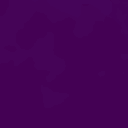
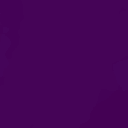
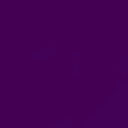
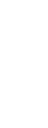
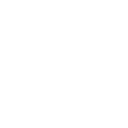

In [ ]:
rcobertura.select(
    rf_extent("cobertura").alias("extent"),
    rf_tile("cobertura").alias("tile")
)

In [ ]:
rj = rpendiente.raster_join(rlluvia, resampling_method="cubic_convolution")

rj = rj.drop("proj_raster_path_agg")

rj = rj.raster_join(relevacion, resampling_method="cubic_convolution")

rj = rj.select('crs','extent', rf_tile('pendiente').alias('pendiente'), rf_tile('lluvia').alias('lluvia'), rf_tile('elevacion').alias('elevacion'))

rj = rj.raster_join(rcurvatura, resampling_method="cubic_convolution")


rj = rj.drop("proj_raster_path_agg")

rj = rj.raster_join(rperfil, resampling_method="cubic_convolution")

rj = rj.drop("proj_raster_path_agg")

rj = rj.raster_join(rcobertura, resampling_method="cubic_convolution")

rj = rj.select('crs','extent', 
  rf_tile('pendiente').alias('pendiente'),
  rf_tile('lluvia').alias('lluvia'), 
  rf_tile('elevacion').alias('elevacion'), 
  rf_tile('curvatura').alias('curvatura'),
  rf_tile('perfil').alias('perfil'),
  rf_tile('cobertura').alias('cobertura'))

rj.printSchema()

root
 |-- crs: crs (nullable = true)
 |-- extent: struct (nullable = true)
 |    |-- xmin: double (nullable = true)
 |    |-- ymin: double (nullable = true)
 |    |-- xmax: double (nullable = true)
 |    |-- ymax: double (nullable = true)
 |-- pendiente: tile (nullable = true)
 |-- lluvia: tile (nullable = true)
 |-- elevacion: tile (nullable = true)
 |-- curvatura: tile (nullable = true)
 |-- perfil: tile (nullable = true)
 |-- cobertura: tile (nullable = true)



In [ ]:
rj = rj.select('pendiente','lluvia','elevacion','curvatura','perfil','crs','extent')

In [ ]:
df_joined = rj.join(ddf, st_intersects(st_geometry('extent'),'geometry'))\
.withColumn('dims', rf_dimensions('elevacion'))

df_labeled = df_joined.withColumn('label',
  rf_rasterize('geometry', st_geometry('extent'), 'deslizamie','dims.cols','dims.rows'))

In [ ]:
print(df_labeled.count())
print(df_labeled.columns)

6888
['pendiente', 'lluvia', 'elevacion', 'curvatura', 'perfil', 'crs', 'extent', 'gid', 'codigo', 'oid_', 'cod_censo', 'cod_cart', 'nuevo_cod', 'departamen', 'municipio', 'lugar_pobl', 'categoria', 'reubicado', 'deslizamie', 'geometry', 'dims', 'label']


# Pipeline Ciencia de Datos (ML)

In [ ]:
from pyrasterframes import TileExploder
from pyrasterframes.rf_types import NoDataFilter

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

In [ ]:
exploder = TileExploder()

noDataFilter = NoDataFilter() \
  .setInputCols(['label', 'mask'])

assembler = VectorAssembler() \
  .setInputCols(bands) \
  .setOutputCol("features")